<a href="https://colab.research.google.com/github/prakash1221/Efficient-Detection-of-Animal-Intrusion-in-Agriculture-Fields-Using-Deep-Learning-Approaches./blob/main/Orthopedic_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
data - pd.read_csv('/content/drive/MyDrive/duplicate-image-detection/dup/baseball')

NameError: name 'data' is not defined

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Set the path to your dataset directory
dataset_dir = '/content/duplicate-image-detection/dup'

# Define your image size
IMG_SIZE = (100, 100)

# Function to load and preprocess images
def load_data(dataset_dir):
    images = []
    labels = []
    classes = os.listdir(dataset_dir)
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, IMG_SIZE)
            image = image.astype(np.float32) / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(i)  # Assign a numerical label to each class
    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data(dataset_dir)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shape of training and validation sets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)


CNN

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: -42.8386 - accuracy: 0.0927 - val_loss: -70.1189 - val_accuracy: 0.1129
Epoch 2/20
16/16 [==============================] - 0s 6ms/step - loss: -142.5472 - accuracy: 0.0927 - val_loss: -184.5076 - val_accuracy: 0.1129
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: -341.9943 - accuracy: 0.0927 - val_loss: -411.5801 - val_accuracy: 0.1129
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: -709.8179 - accuracy: 0.0927 - val_loss: -827.8444 - val_accuracy: 0.1129
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: -1336.6566 - accuracy: 0.0927 - val_loss: -1485.0717 - val_accuracy: 0.1129
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: -2336.4280 - accuracy: 0.0927 - val_loss: -2505.5061 - val_accuracy: 0.1129
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: -3786.0271 - accuracy: 0.0927 - val_loss: -4042.3

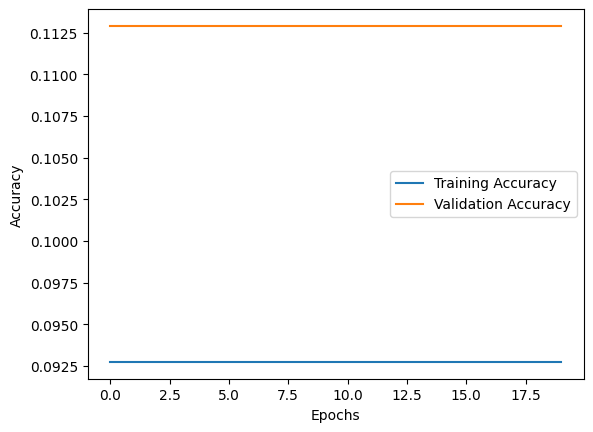

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the datasets
data_2C = pd.read_csv("column_2C_weka.csv")
data_3C = pd.read_csv("column_3C_weka.csv")

# Combine both datasets
combined_data = pd.concat([data_2C, data_3C], ignore_index=True)

# Encode the 'class' labels
label_encoder = LabelEncoder()
combined_data['class'] = label_encoder.fit_transform(combined_data['class'])

# Extract features and labels
X = combined_data.drop('class', axis=1).values
y = combined_data['class'].values

# Handle NaN values
X = SimpleImputer(strategy='mean').fit_transform(X)

# Reshape the input features for CNN
X = X.reshape(-1, 7, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model with a final Dense layer for Random Forest classification
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(7, 1)))  # Increased number of filters
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Increased number of units
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))  # Increased number of epochs

# Extract features using the CNN model
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)  # Increased number of estimators
rf_classifier.fit(X_train_features, y_train)

# Predict using the Random Forest classifier
y_pred = rf_classifier.predict(X_test_features)

# Evaluate the model
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


compared

Epoch 1/10
16/16 [==============================] - 1s 16ms/step - loss: -16.6217 - accuracy: 0.0988 - val_loss: -30.2411 - val_accuracy: 0.1129
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: -55.1832 - accuracy: 0.0927 - val_loss: -68.9615 - val_accuracy: 0.1129
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: -116.6201 - accuracy: 0.0927 - val_loss: -136.2501 - val_accuracy: 0.1129
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: -216.3223 - accuracy: 0.0927 - val_loss: -253.4654 - val_accuracy: 0.1129
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: -400.5526 - accuracy: 0.0927 - val_loss: -429.5853 - val_accuracy: 0.1129
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: -670.8665 - accuracy: 0.0927 - val_loss: -705.4749 - val_accuracy: 0.1129
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: -1067.2883 - accuracy: 0.0927 - val_loss: -1119.3850 - 

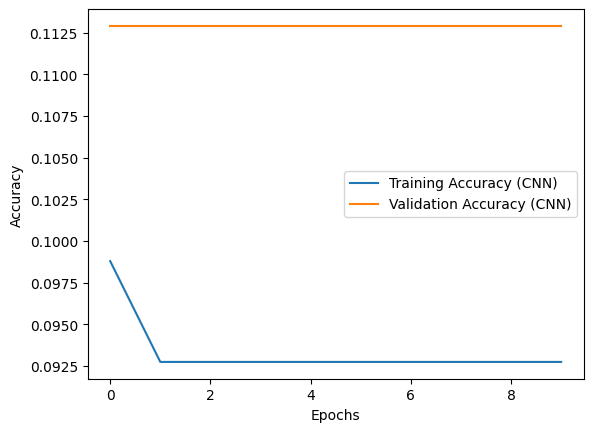

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the datasets
data_2C = pd.read_csv("column_2C_weka.csv")
data_3C = pd.read_csv("column_3C_weka.csv")

# Combine both datasets
combined_data = pd.concat([data_2C, data_3C], ignore_index=True)

# Encode the 'class' labels
label_encoder = LabelEncoder()
combined_data['class'] = label_encoder.fit_transform(combined_data['class'])

# Extract features and labels
X = combined_data.drop('class', axis=1).values
y = combined_data['class'].values

# Handle NaN values
X = SimpleImputer(strategy='mean').fit_transform(X)

# Reshape the input features for CNN
X = X.reshape(-1, 7, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model with a final Dense layer
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(7, 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Final Dense layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy (CNN): {test_acc}")

# Extract features using the CNN model
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Train a K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_features, y_train)

# Predict using the KNN classifier
y_pred_knn = knn_classifier.predict(X_test_features)

# Evaluate the KNN model
test_acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Test Accuracy (KNN): {test_acc_knn}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy (CNN)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


title 2

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the datasets
data_2C = pd.read_csv("column_2C_weka.csv")
data_3C = pd.read_csv("column_3C_weka.csv")

# Combine both datasets
combined_data = pd.concat([data_2C, data_3C], ignore_index=True)

# Encode the 'class' labels
label_encoder = LabelEncoder()
combined_data['class'] = label_encoder.fit_transform(combined_data['class'])

# Extract features and labels
X = combined_data.drop('class', axis=1).values
y = combined_data['class'].values

# Handle NaN values
X = SimpleImputer(strategy='mean').fit_transform(X)

# Reshape the input features for CNN
X = X.reshape(-1, 7, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model with a final Dense layer
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(7, 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Final Dense layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy (CNN): {test_acc}")

# Extract features using the CNN model
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_features, y_train)

# Predict using the Decision Tree classifier
y_pred_dt = dt_classifier.predict(X_test_features)

# Evaluate the Decision Tree model
test_acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy (Decision Tree): {test_acc_dt}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy (CNN)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'column_2C_weka.csv'

title 3

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the datasets
data_2C = pd.read_csv("column_2C_weka.csv")
data_3C = pd.read_csv("column_3C_weka.csv")

# Combine both datasets
combined_data = pd.concat([data_2C, data_3C], ignore_index=True)

# Encode the 'class' labels
label_encoder = LabelEncoder()
combined_data['class'] = label_encoder.fit_transform(combined_data['class'])

# Extract features and labels
X = combined_data.drop('class', axis=1).values
y = combined_data['class'].values

# Handle NaN values
X = SimpleImputer(strategy='mean').fit_transform(X)

# Reshape the input features for CNN
X = X.reshape(-1, 7, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model with a final Dense layer
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(7, 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Final Dense layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy (CNN): {test_acc}")

# Extract features using the CNN model
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_features, y_train)

# Predict using the SVM classifier
y_pred_svm = svm_classifier.predict(X_test_features)

# Evaluate the SVM model
test_acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test Accuracy (SVM): {test_acc_svm}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy (CNN)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'column_2C_weka.csv'

title 4

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the datasets
data_2C = pd.read_csv("column_2C_weka.csv")
data_3C = pd.read_csv("column_3C_weka.csv")

# Combine both datasets
combined_data = pd.concat([data_2C, data_3C], ignore_index=True)

# Encode the 'class' labels
label_encoder = LabelEncoder()
combined_data['class'] = label_encoder.fit_transform(combined_data['class'])

# Extract features and labels
X = combined_data.drop('class', axis=1).values
y = combined_data['class'].values

# Handle NaN values
X = SimpleImputer(strategy='mean').fit_transform(X)

# Reshape the input features for CNN
X = X.reshape(-1, 7, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model with a final Dense layer
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(7, 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Final Dense layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy (CNN): {test_acc}")

# Extract features using the CNN model
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Train a Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_features, y_train)

# Predict using the Logistic Regression classifier
y_pred_lr = lr_classifier.predict(X_test_features)

# Evaluate the Logistic Regression model
test_acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Test Accuracy (Logistic Regression): {test_acc_lr}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy (CNN)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'column_2C_weka.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')